# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> EE 044165/6 - Technion - Intro to Machine Learning Lab

## Part 1 - Loading the Data, Pre-Processing and Naive Bayes

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Loading the Data
* Data Representation
* Train-Test Separation
* Naive Bayes

#### Notes
* To run a code block, select it (with mouse) and press Ctrl + Enter to run it or Shift + Enter to run it and move on to the next block.
* To get description of functions and classes, run `help(name_of_function)`.
* To display lines in the code block, select the block, press ESC and then 'L'.

In [1]:
# enable auto-reload modules
%reload_ext autoreload
%autoreload 2

# imports for the lab
import os, functools
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper_functions import email_pipeline, execute_repeats, get_chunks


# auxiliary function for multiprocessing
def run_parallel(func, param, n_repeats):
    chunks = get_chunks(n_repeats)
    if __name__ == '__main__':  # needed to work with jupyter + windows
        with ProcessPoolExecutor(max_workers=len(chunks)) as executor:
            outs = executor.map(functools.partial(execute_repeats, func=func, param=param), chunks)
    return sum(outs, [])

### <img src="https://img.icons8.com/dusk/64/000000/handshake.png" style="height:50px;display:inline"> Get to Know the Data
The data consists of 3,500 real e-mails from Spam Assassing. We will use `pandas` to load and read the data. Then, we will take a look at a sample of the data.

In [2]:
# load the data
email_data = pd.read_csv('./email_data.csv')
print("number of samples: ", len(email_data))
print("number of spam emails: ", np.sum(email_data.Label == 'S'))
print("number of ham emails: ", np.sum(email_data.Label == 'H'))

# let's look at 15 random samples from it.
email_data.sample(15)

number of samples:  3052
number of spam emails:  501
number of ham emails:  2551


,To,From,Subject,Content,Label
2865,81016h@geocities.com,Marv Sean <78l95@geocities.com>,Pics for you,\nGET FREE ACCESS TO XXX PORN!INSTANT ACCESS.....,S
464,fork@example.com,Dave Long <dl@silcom.com>,Re: no matter where you go,\n\n> Another thing to note about Australia is...,H
1076,exmh-users@example.com,"""David B. Thompson"" <thompson@shelob.ce.ttu.edu>",Re: Sorting,> > You're probably running exmh on a local ma...,H
1272,rpm-zzzlist@freshrpms.net,Ricardo Mota <ricardo@mdbcomunicacao.com.br>,Re: Should mplayer be build with Win32 codecs?,"\n\nHi,\n\nFirst you have to get the win32 fil...",H
2449,yyyy@example.com,guardian <rssfeeds@example.com>,Born to be wild - then shot,"URL: http://www.newsisfree.com/click/-1,862211...",H
1595,'Stephane Lentz' <Stephane.Lentz@ansf.alcatel....,Jason Qualkenbush <Jason.Qualkenbush@watchguar...,RE: [SAtalk] separate inbound and outbound,\nNo I was just a little confused because I'm ...,H
2454,yyyy@example.com,aaronsw <rssfeeds@example.com>,Apple: Heinous DVD Pirates,URL: http://www.aaronsw.com/weblog/000644\nDat...,H
605,fork@example.com,Gordon Mohr <gojomo@usa.net>,More on promiscuity and word choice Re: Sellin...,"Robert Harley writes:\n> >OK, then. Consider a...",H
961,johnhall@evergo.net,Owen Byrne <owen@permafrost.net>,"Re: Our friends the Palestinians, Our servants...","John Hall wrote:\n\n>It wasn't gloating, it wa...",H
978,fork@example.com,Dave Long <dl@silcom.com>,RE: The Curse of India's Socialism,\n\n> You have...,H


### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> Represent the Data
We will now transform the data into a form which is applicable for the computer, for the algorithms - numbers.

In [3]:
# let's separate the Content and the Label for a sample of the data
data_sample = email_data.sample(15)
X_sample = data_sample['Content'].values
y_sample = data_sample['Label'].values == 'S'  # 1 Spam, 0 for Ham

# transform the data
X_sample_augmented = email_pipeline.fit_transform(X_sample)

# let's look at what we got
print('X_sample_augmented type: \n',type(X_sample_augmented))
print('\n X_sample_augmented: \n', X_sample_augmented)

print('\n y_sample: \n', y_sample)

X_sample_augmented type: 
 <class 'scipy.sparse._csr.csr_matrix'>

 X_sample_augmented: 
   (0, 0)	1
  (0, 1)	2
  (0, 29)	1
  (0, 56)	1
  (0, 81)	1
  (0, 110)	1
  (0, 176)	1
  (1, 0)	5
  (1, 2)	1
  (1, 5)	1
  (1, 8)	1
  (1, 11)	1
  (1, 16)	1
  (1, 18)	2
  (1, 19)	1
  (1, 26)	2
  (1, 31)	1
  (1, 32)	2
  (1, 33)	1
  (1, 38)	1
  (1, 45)	1
  (1, 46)	1
  (1, 57)	1
  (1, 68)	1
  (1, 69)	1
  :	:
  (13, 192)	1
  (13, 214)	1
  (13, 237)	1
  (13, 249)	1
  (13, 256)	1
  (13, 278)	1
  (14, 0)	1
  (14, 2)	3
  (14, 5)	3
  (14, 8)	1
  (14, 16)	1
  (14, 19)	1
  (14, 31)	1
  (14, 33)	1
  (14, 36)	1
  (14, 38)	1
  (14, 58)	1
  (14, 59)	1
  (14, 75)	1
  (14, 82)	1
  (14, 83)	1
  (14, 88)	1
  (14, 153)	1
  (14, 175)	3
  (14, 229)	1

 y_sample: 
 [False False  True False False False False False False False  True  True
 False False False]


In [4]:
# from sparse to dense
X_sample_augmented = X_sample_augmented.todense()
print('X_sample_augmented type: \n',type(X_sample_augmented))
print('\n X_sample_augmented: \n', X_sample_augmented)

X_sample_augmented type: 
 <class 'numpy.matrix'>

 X_sample_augmented: 
 [[1 2 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [3 1 0 ... 0 0 0]
 [4 1 1 ... 0 0 0]
 [1 0 3 ... 0 0 0]]


In [5]:
# let's look at the vocabulary
dictionary = email_pipeline['Wordcount to Vector'].vocabulary_
print(dictionary)

{'the': 0, 'and': 1, 'you': 2, 'for': 3, 'your': 4, 'that': 5, 'business': 6, 'grants': 7, 'this': 8, 'are': 9, 'money': 10, 'free': 11, 'will': 12, 'get': 13, 'government': 14, 'can': 15, 'from': 16, 'with': 17, 'have': 18, 'was': 19, 'programs': 20, 'home': 21, 'not': 22, 'grant': 23, 'step': 24, 'guide': 25, 'all': 26, 'people': 27, 'complete': 28, 'how': 29, 'but': 30, 'its': 31, 'know': 32, 'just': 33, 'what': 34, 'new': 35, 'has': 36, 'much': 37, 'some': 38, 'any': 39, 'more': 40, 'over': 41, 'these': 42, 'only': 43, 'help': 44, 'about': 45, 'dont': 46, 'small': 47, 'here': 48, 'start': 49, 'make': 50, 'based': 51, 'one': 52, 'been': 53, 'dollars': 54, 'purchase': 55, 'date': 56, 'could': 57, 'other': 58, 'may': 59, 'wrote': 60, 'spam': 61, 'idea': 62, 'own': 63, 'need': 64, 'year': 65, 'access': 66, 'secrets': 67, 'which': 68, 'there': 69, 'another': 70, 'easy': 71, 'least': 72, 'results': 73, 'into': 74, 'think': 75, 'valuable': 76, 'each': 77, 'businesses': 78, 'keep': 79, 'ap

### <img src="https://img.icons8.com/flat_round/64/000000/split.png" style="height:50px;display:inline"> Split the Data
We will now split the data into train and test sets, so we can train and evaluate our algorithms.

In [7]:
# Complete the code of the function train_test_split in part_1_functions.py
from part_1_functions import train_test_split


# test your function
X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# transform
X_train_augmented = email_pipeline.fit_transform(X_train)
X_test_augmented = email_pipeline.transform(X_test)

print("num train samples: ", X_train.shape[0])
print("num test samples: ", X_test.shape[0])
print("shape after augmentation: ", X_train_augmented.shape)
print("fraction of spam in the original: ", np.mean(y == 1))
print("fraction of spam in the train set: ", np.mean(y_train == 1))

num train samples:  2441
num test samples:  611
shape after augmentation:  (2441, 300)
fraction of spam in the original:  0.16415465268676277
fraction of spam in the train set:  0.16222859483818108


### <img src="https://img.icons8.com/color/96/000000/rubiks-cube.png" style="height:50px;display:inline"> Naive Bayes
We will now implement the Naive Bayes algorithm, using the Scikit-Learn formulation.
Each ML algorithm has 2 methods:
1. `fit` - Training stage. the algorithm receives $X_{train}$, $y_{train}$, and learns the parameters to perform classification.
2. `predict` - The algorithm uses the learned parameters to perform prediction on $X_{test}$.


* For the likelihood parameters calculation, you can use the pre-made function `estimate_likelihood_params`. Read its description and how to use it.

In [8]:
# Complete the code of the function calc_err in part_1_functions.py
from part_1_functions import calc_err

In [9]:
# Complete the code of the class MlabNaiveBayes in part_1_functions.py
from part_1_functions import MlabNaiveBayes

# let's see it in action for the gaussian case
# create classifier
clf = MlabNaiveBayes(dist_type="gaussian", n_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

ValueError: ignored

In [10]:
* OH NO! WHAT HAPPEND??

Object `HAPPEND` not found.


In [16]:
# let's see it in action for the multinomial case
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial", n_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)

# predict on test set
y_pred = clf.predict(X_test_augmented)

# calculate the error
error = calc_err(y_pred, y_test)
print(f"classification error for multinomial: {error * 100:.3f}% \n")

# let's look at the posterior values
print(f"shape of the posterior values: {clf.last_scores.shape:} \n")
print("posterior values for multinomial:")
print(clf.last_scores[:20])

classification error for multinomial: 3.928% 

shape of the posterior values: (611, 2) 

posterior values for multinomial:
[[3.19763783e-012 1.07634639e-015]
 [3.01760058e-049 3.24068130e-051]
 [1.55753718e-005 2.16934846e-008]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [5.16139455e-044 1.41856201e-046]
 [2.48841621e-045 5.65122963e-049]
 [1.45048151e-042 0.00000000e+000]
 [1.43728580e-063 0.00000000e+000]
 [1.55753718e-005 2.16934846e-008]
 [8.12172773e-025 2.23478838e-027]
 [0.00000000e+000 0.00000000e+000]
 [2.06429429e-015 9.55697646e-018]
 [9.61672045e-122 8.02458590e-132]
 [4.93517496e-166 2.40892321e-155]
 [2.00846919e-069 0.00000000e+000]
 [1.76666618e-120 1.43363715e-124]
 [4.70361920e-180 1.52065777e-200]
 [7.29912295e-113 0.00000000e+000]
 [5.20235616e-052 0.00000000e+000]]


In [15]:

# let's see it in action for the smooth multinomial case
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial_smooth", n_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

# calculate the error
error = calc_err(y_pred, y_test)
print(f"classification error for multinomial_smooth: {error * 100:.3f}% \n")

print("posterior values for multinomial_smooth:")
print(clf.last_scores[:20])

classification error for multinomial_smooth: 3.928% 

posterior values for multinomial_smooth:
[[3.19308732e-012 1.14620294e-015]
 [3.05430668e-049 4.52306434e-051]
 [1.55677723e-005 2.30135868e-008]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [5.17112144e-044 1.49485947e-046]
 [2.48475829e-045 5.92913892e-049]
 [1.45096798e-042 2.94904163e-052]
 [1.43489471e-063 6.91302657e-069]
 [1.55677723e-005 2.30135868e-008]
 [8.10127450e-025 2.28967918e-027]
 [0.00000000e+000 0.00000000e+000]
 [2.06656456e-015 1.01199577e-017]
 [9.68002684e-122 9.80574646e-132]
 [5.02140978e-166 2.24191512e-155]
 [2.01721009e-069 9.80996535e-076]
 [1.80239847e-120 1.94516666e-124]
 [4.66637251e-180 2.88850182e-200]
 [7.45782412e-113 4.97238986e-127]
 [5.20665494e-052 3.76317904e-057]]


In [14]:
# let's see it in action for the smooth multinomial case  with logarithmic probability
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial_smooth", n_classes=2, use_log_prob=True)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

# calculate the error
error = calc_err(y_pred, y_test)
print(f"classification error for multinomial_smooth & log_prob: {error * 100:.3f}% \n")

print("log-posterior values for multinomial_smooth:")
print(clf.last_scores[:20])

classification error for multinomial_smooth & log_prob: 2.128% 

log-posterior values for multinomial_smooth:
[[  -26.47003285   -34.40232171]
 [ -111.71011693  -115.92265003]
 [  -11.07030766   -17.58718106]
 [ -971.51258925 -1028.60290076]
 [ -814.98702186  -804.07953753]
 [  -99.67065451  -105.51688208]
 [ -102.7061538   -111.04679056]
 [  -96.336343    -118.65294459]
 [ -144.70176938  -156.94496388]
 [  -11.07030766   -17.58718106]
 [  -55.47260593   -61.3413858 ]
 [-1256.95485359 -1338.53717112]
 [  -33.8128888    -39.13202219]
 [ -278.64531667  -301.65826369]
 [ -380.61541471  -356.09335895]
 [ -158.176656    -172.71306833]
 [ -275.7210929   -284.85520387]
 [ -412.92493473  -459.45628063]
 [ -258.18285181  -290.82440623]
 [ -118.08448723  -129.92208621]]


In [38]:
"""
Analyze the effect of train sets of different sizes
"""

# Complete the code of the function run_train_and_test in part_1_functions.py
from part_1_functions import run_train_and_test

# Trial run for the function:
X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham
err = run_train_and_test(X, y, train_ratio=1, test_size=0.2)
print(f'Trial error: {100*err:.3f}% \n')

# Run grid of train_ratios and n_repeats
n_repeats = 50
test_size = 0.2
train_ratios = [0.1, 0.2, 0.4, 0.8, 1]
test_errors = np.zeros(len(train_ratios))
test_errors_std = np.zeros(len(train_ratios))

for i_grid, train_ratio in enumerate(train_ratios):
    print(f" train ratio: {train_ratio}, ({i_grid+1}/{len(train_ratios)})")
    errors = run_parallel(run_train_and_test,
                                  [X, y, train_ratio, test_size],
                                  n_repeats)
    test_errors[i_grid] = np.mean(errors)
    test_errors_std[i_grid] = np.std(errors)
# end for
print('done')


Trial error: 1.637% 

 train ratio: 0.1, (1/5)
 train ratio: 0.2, (2/5)
 train ratio: 0.4, (3/5)
 train ratio: 0.8, (4/5)
 train ratio: 1, (5/5)
done


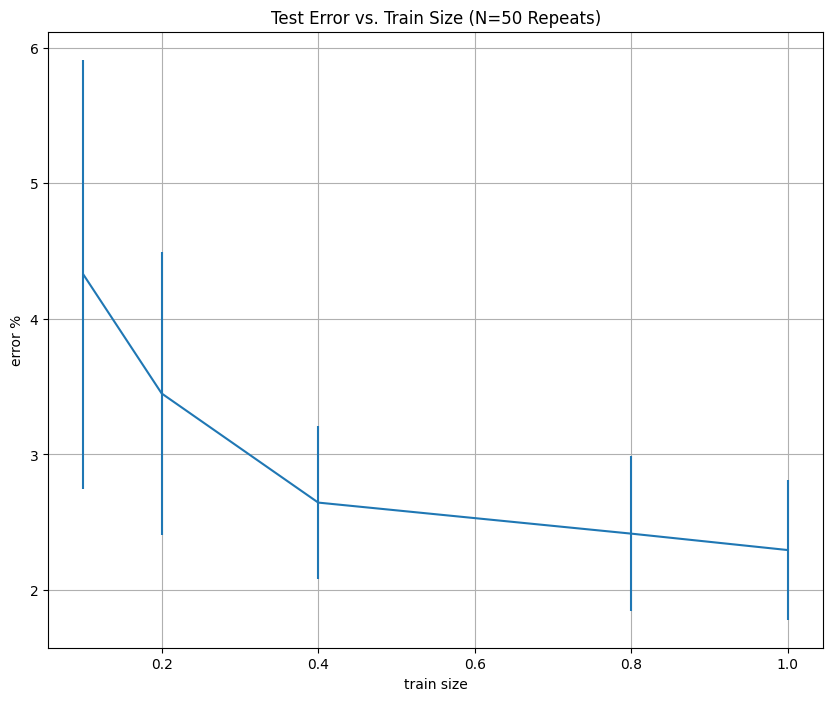

In [39]:
"""
Plot the results
"""
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.errorbar(train_ratios, 100*test_errors, yerr=100*test_errors_std)
ax.set_xlabel("train size")
ax.set_ylabel("error %")
ax.grid()
ax.set_title(f"Test Error vs. Train Size (N={n_repeats} Repeats)")
plt.show()

In [40]:
# let's do the same for the evaluation on the train set
# repeat for train error

# Complete the code of the function run_train_and_test_on_train in part_1_functions.py
from part_1_functions import run_train_and_test_on_train


# Trial run for the function:
err = run_train_and_test_on_train(X, y, train_ratio=1, test_size=0.2)
print(f'Trial error: {100*err:.3f}% \n')

# Run grid of train_ratios and n_repeats
n_repeats = 20
train_errors  = np.zeros(len(train_ratios))
train_errors_std   = np.zeros(len(train_ratios))
for i_grid, train_ratio in enumerate(train_ratios):
    print(f"train ratio: {train_ratio}, ({i_grid+1}/{len(train_ratios)})")
    errors = run_parallel(run_train_and_test_on_train,
                              [X, y, train_ratio, test_size],
                              n_repeats)
    train_errors[i_grid] = np.mean(errors)
    train_errors_std[i_grid] = np.std(errors)
# end for
print('done')


Trial error: 2.253% 

train ratio: 0.1, (1/5)
train ratio: 0.2, (2/5)
train ratio: 0.4, (3/5)
train ratio: 0.8, (4/5)
train ratio: 1, (5/5)
done


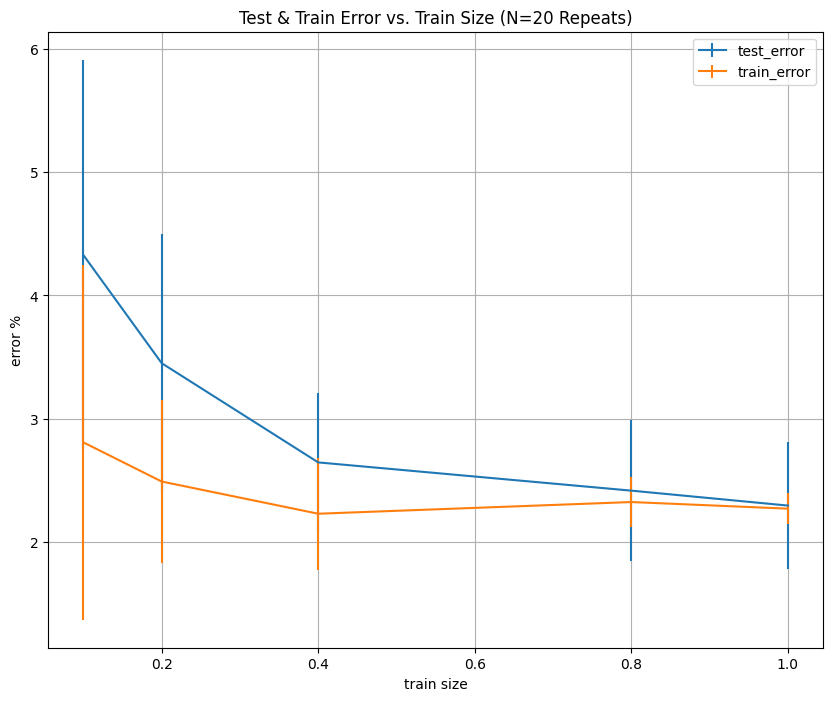

In [41]:
# plot the 2 graphs
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.errorbar(train_ratios, 100*test_errors, yerr=100*test_errors_std, label="test_error")
ax.errorbar(train_ratios, 100*train_errors, yerr=100*train_errors_std, label="train_error")
ax.set_xlabel("train size")
ax.set_ylabel("error %")
ax.legend()
ax.grid()
ax.set_title(f"Test & Train Error vs. Train Size (N={n_repeats} Repeats)")
plt.show()

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Notebook made by <a href="mailto:taldanielm@campus.technion.ac.il">Tal Daniel</a> (August 2019)
* Updates: Ron Amit (January 2021)